I'm excited to share my project on predicting medical insurance prices using machine learning in Python, which highlights the power of data to transform healthcare by providing more personalized and fair pricing.**bold text**

In [ ]:
import pandas as pd
df = pd.read_csv('/dev/insurance.csv', sep = ";")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,cape,16884.92400
1,18,male,33.770,1,no,Natal,1725.55230
2,28,male,33.000,3,no,Natal,4449.46200
3,33,male,22.705,0,no,Transvaal,21984.47061
4,32,male,28.880,0,no,Transvaal,3866.85520


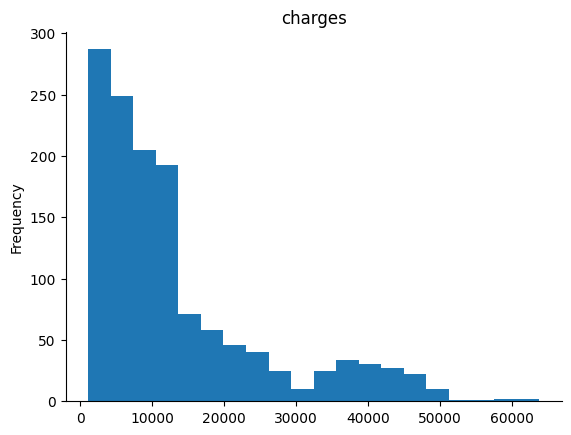

In [ ]:
# @title charges

from matplotlib import pyplot as plt
df['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

The graph, titled “Charges,” shows the range and frequency of insurance charges, providing insights into common premium amounts and identifying potential outliers. The histogram helps us understand the overall distribution and variability in the data.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [ ]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


To gain deeper insights into our dataset, we can examine the descriptive statistical measures of the continuous variables. This analysis includes calculating key metrics such as mean, median, standard deviation, minimum, and maximum values. By doing so, we can understand the central tendency, dispersion, and overall distribution of the data.

For instance, in our medical insurance dataset, we can look at the following measures for the charges variable:

Mean (Average): Provides the average insurance charge, giving us a sense of the typical premium amount.
Median: Indicates the middle value of the charges, helping us understand the central point of the data distribution.
Standard Deviation: Measures the variability or spread of the charges, showing how much the charges deviate from the mean.
Minimum and Maximum Values: Highlight the range of charges, identifying the lowest and highest premiums in the dataset.
By analyzing these descriptive statistics, we can better understand the characteristics of the insurance charges and identify any patterns or anomalies that may exist.

In [ ]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


here we can conclude that there are no null values in the dataset given.

<ipython-input-28-bc8395dbc63f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i + 1)


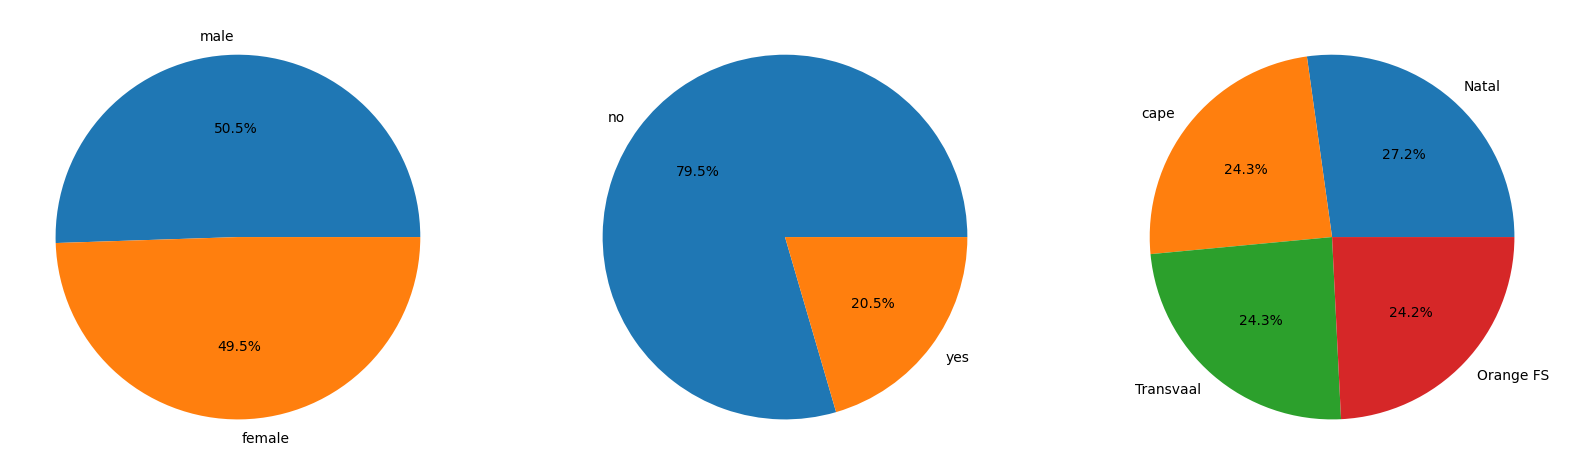

In [ ]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()




The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

<ipython-input-69-c9711c1a97a4>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


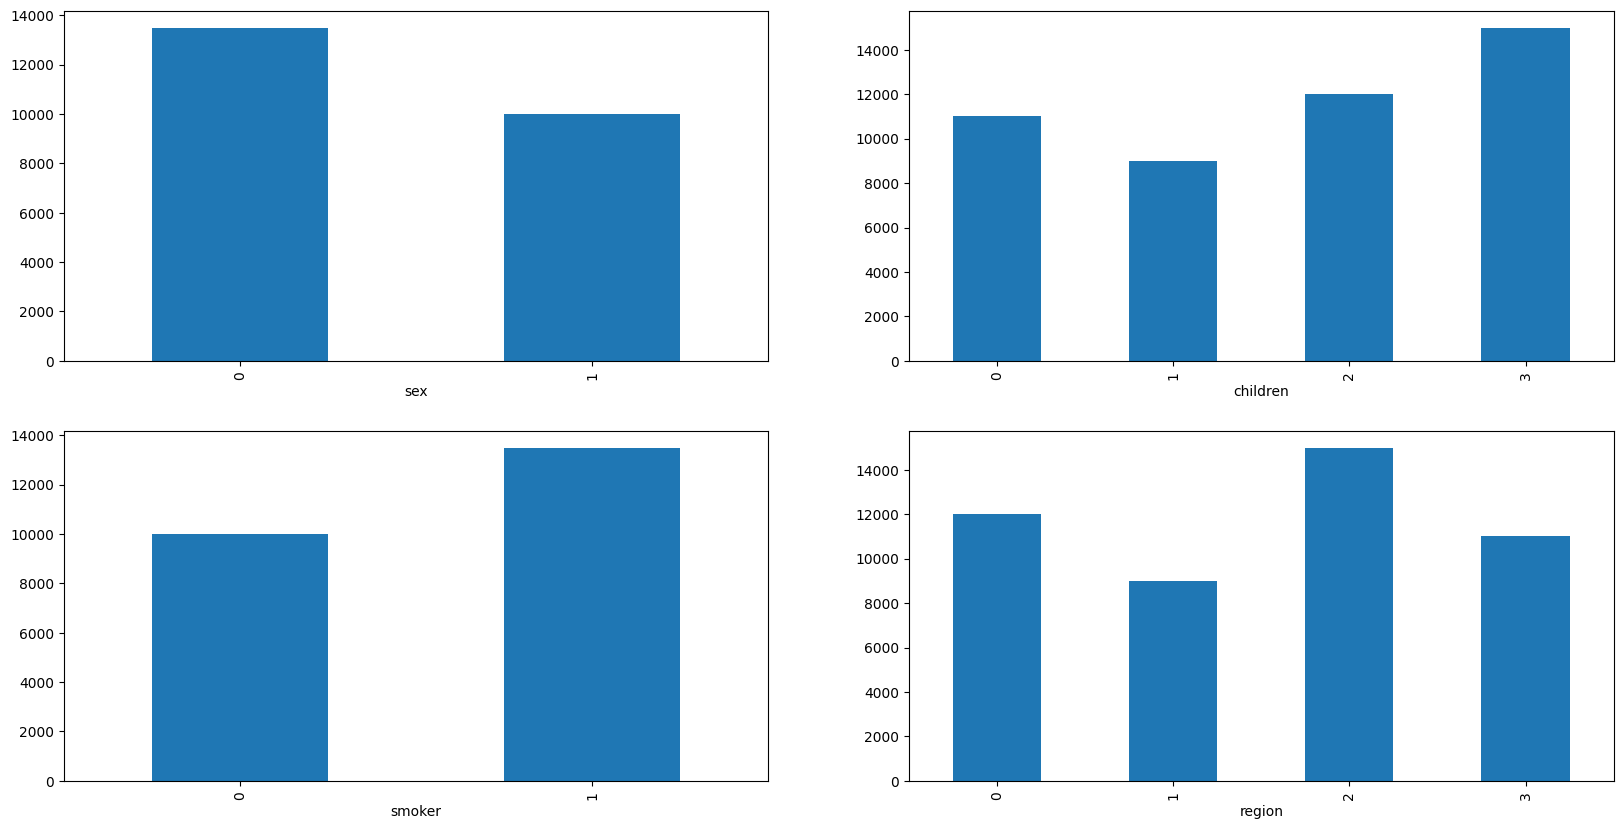

In [ ]:
features = ['sex', 'children', 'smoker', 'region']
cls = ['Gold', 'Green','Yellow','Purple']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()




Now let’s look at some of the observations which are shown in the above graphs:

-Charges are on the higher side for males as compared to females but the difference is not that much.

-Premium charged from the smoker is around thrice that which is charged from non-smokers.

-Charges are approximately the same in the given four regions.

<ipython-input-78-9443a9e13208>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)  # Create a 2x2 subplot grid


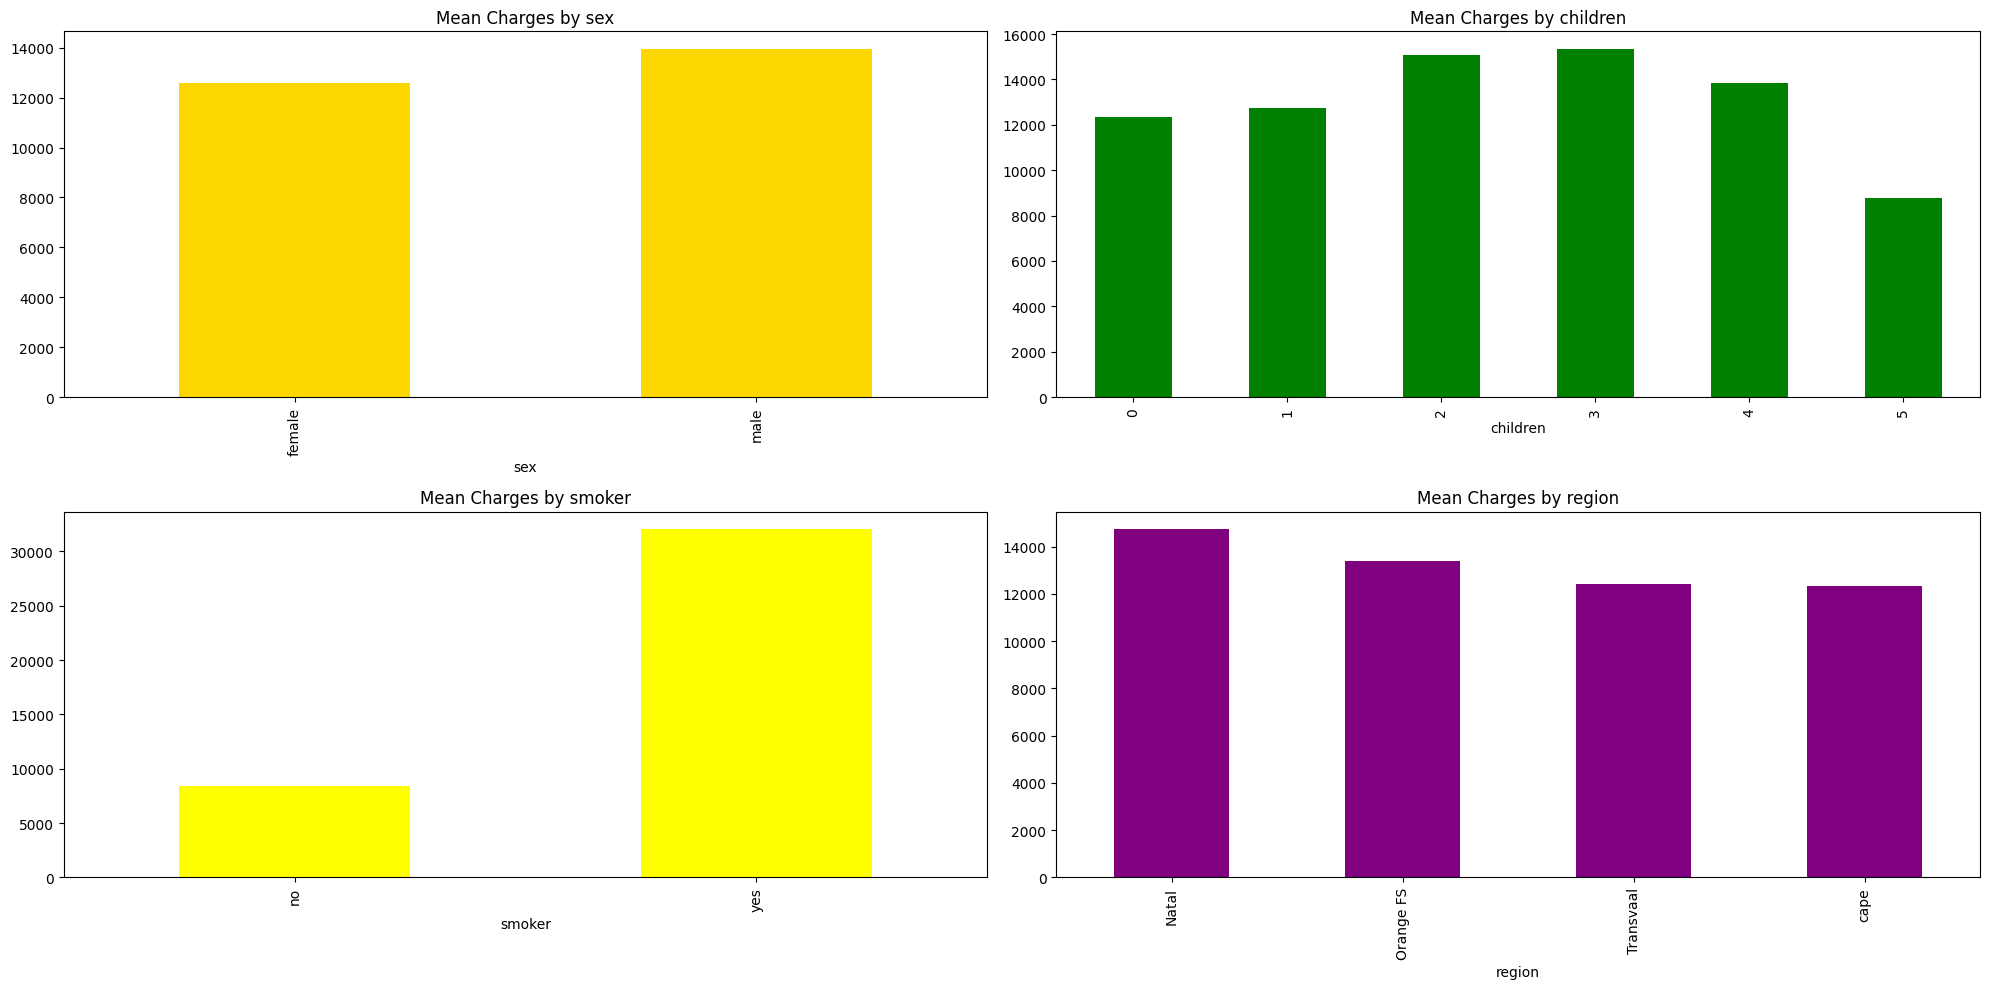

In [ ]:
import matplotlib.pyplot as plt

features = ['sex', 'children', 'smoker', 'region']
cls = ['Gold', 'Green', 'Yellow', 'Purple']  # List of colors for each plot
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar(color=cls[i])
    plt.title(f'Mean Charges by {col}')
plt.tight_layout()
plt.show()


this is the same graph as above but made it show different colours for each grouph.

<ipython-input-30-70f3b785020d>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


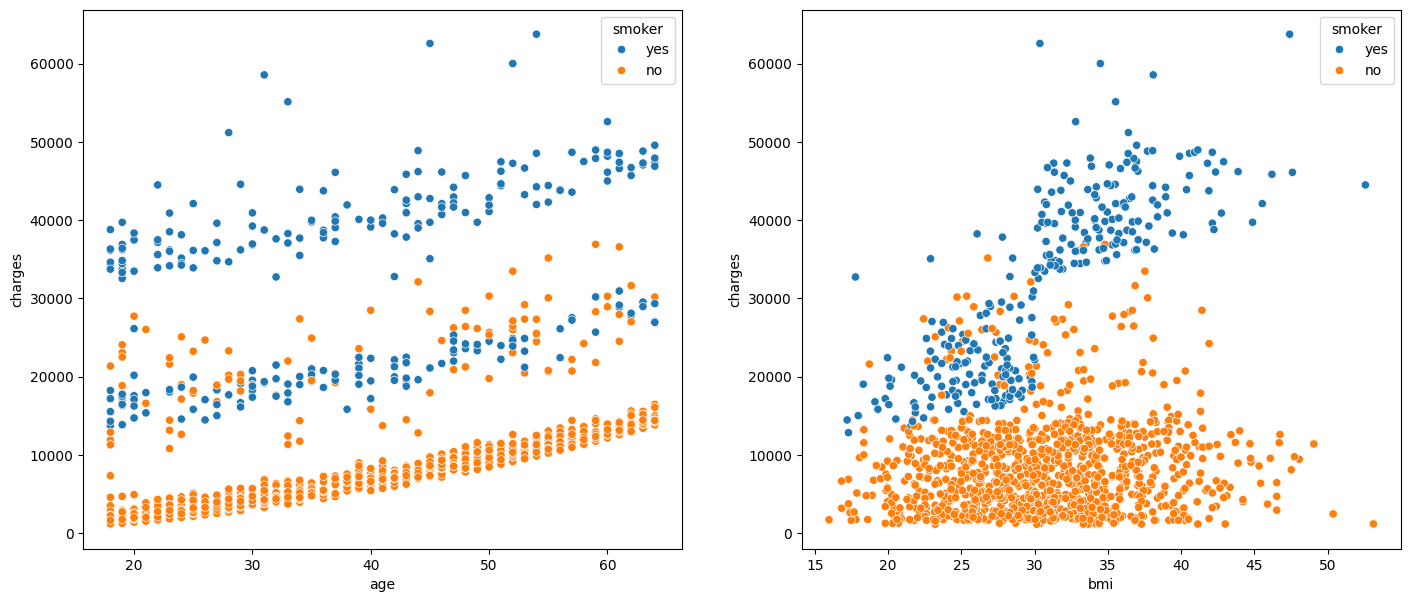

In [ ]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()




A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.



<Axes: ylabel='age'>

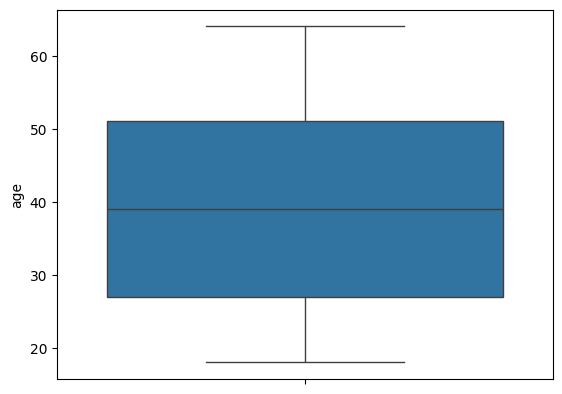

In [ ]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])


we can see that there are no outliers present in age column

<Axes: ylabel='bmi'>

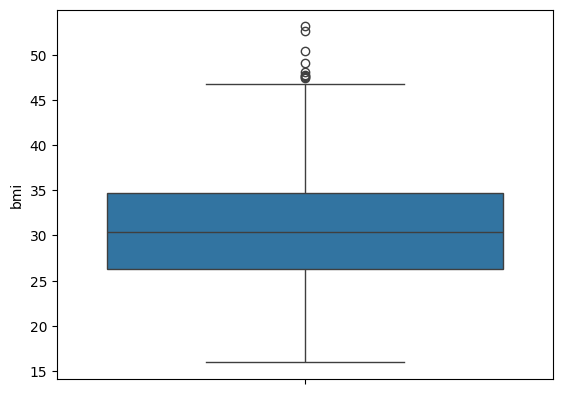

In [ ]:
sns.boxplot(df['bmi'])


Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

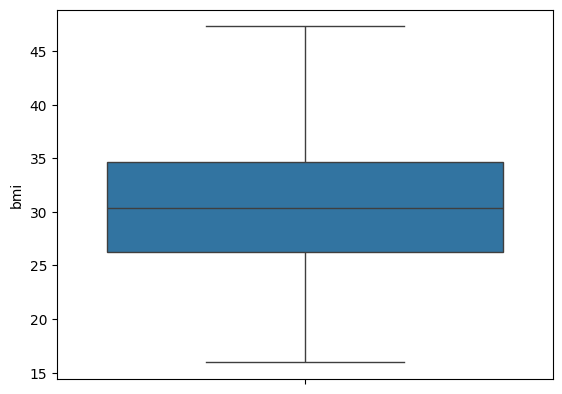

In [ ]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])




Now we successfully treated the outliers .

Data Wrangling

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [ ]:


df['age'].skew(),df['bmi'].skew()



(0.054780773126998195, 0.23289153320569975)

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'Transvaal':1, 'Orange FS':2,'Natal':3,'cape':4})


In [ ]:
df.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,NaN,0.111998,0.041536,NaN,NaN,0.298308
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.111998,NaN,1.000000,0.013692,NaN,NaN,0.199063
children,0.041536,NaN,0.013692,1.000000,NaN,NaN,0.067389
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.298308,NaN,0.199063,0.067389,NaN,NaN,1.000000


Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

Output: below

In [ ]:
df.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,NaN,0.111998,0.041536,NaN,NaN,0.298308
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.111998,NaN,1.000000,0.013692,NaN,NaN,0.199063
children,0.041536,NaN,0.013692,1.000000,NaN,NaN,0.067389
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.298308,NaN,0.199063,0.067389,NaN,NaN,1.000000


Model Development
There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other.